In [1]:
#import packages needed for performing time series
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
#import dataset used for the analysis
df = pd.read_csv (r'C:\Users\fahim\Documents\0_WGUDocuments\d213\medical_time_series.csv')
# Check data types and number of values, as well as overall size of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Day      731 non-null    int64  
 1   Revenue  731 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 11.5 KB


In [2]:
# Visually inspect dataframe and see if there are any issues
pd.set_option("display.max_columns", None)
df

,Day,Revenue
0,1,0.000000
1,2,-0.292356
2,3,-0.327772
3,4,-0.339987
4,5,-0.124888
...,...,...
726,727,15.722056
727,728,15.865822
728,729,15.708988
729,730,15.822867


In [3]:
# In the dataframe, 'Day' doesn't tell us the start and end date, and 'Revenue' doesn't specify currency
# For this analysis, we will assign start date, in datetime format
start_date = pd.to_datetime('2008-01-01')
# Convert Day column to differences in time
df['Day'] = pd.to_timedelta(df['Day']-1, unit='D') + start_date
# Rename columns
df.columns = ['date', 'revenue']
# Set the index for the 'date' column
df.set_index('date', inplace=True)
# View the dataframe to verify that all of the changes have been made
df

,revenue
date,
2008-01-01,0.000000
2008-01-02,-0.292356
2008-01-03,-0.327772
2008-01-04,-0.339987
2008-01-05,-0.124888
...,...
2009-12-27,15.722056
2009-12-28,15.865822
2009-12-29,15.708988


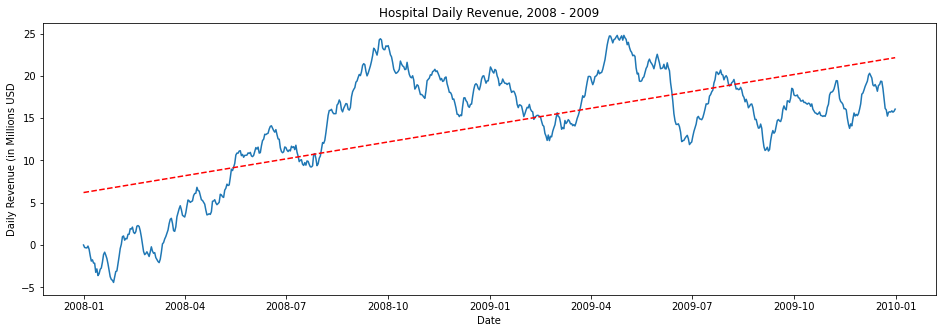

In [4]:
# Plot a line graph visualizing the realization of the time series
plt.figure(figsize = [16,5])
plt.title("Hospital Daily Revenue, 2008 - 2009")
plt.xlabel("Date")
plt.ylabel("Daily Revenue (in Millions USD")
# Plot time series data
plt.plot(df)
# Generate trend line
x = mdates.date2num(df.index)
y = df.revenue
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
# Plot trendline
plt.plot(x, p(x), "r--")
plt.show()

Resulting Test statistic of an augmented Dicky-Fuller test on the data is -17.3748, with a p-value of 0.0


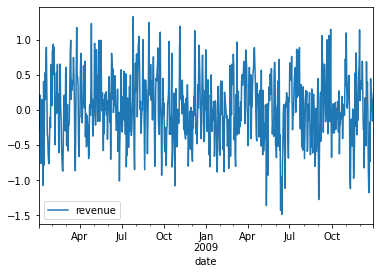

In [5]:
# Perform Augmented Dicky-Fuller on the data to test if it is stationary
df_trans = df.diff().dropna()
adfuller_results = adfuller(df_trans.revenue)
# Print resulting test-statistic and p-value
print(f"Resulting Test statistic of an augmented Dicky-Fuller test on the data is {round(adfuller_results[0], 4)}, with a p-value of {round(adfuller_results[1], 8)}")
# Plot to verify stationarity
df_trans.plot();

In [6]:
# Split time series into a training set and a test set
train, test = train_test_split(df_trans, test_size=0.2, shuffle=False, random_state=369)
train

,revenue
date,
2008-01-02,-0.292356
2008-01-03,-0.035416
2008-01-04,-0.012215
2008-01-05,0.215100
2008-01-06,-0.366702
...,...
2009-08-03,-0.694370
2009-08-04,-0.282765
2009-08-05,0.104732


In [7]:
test

,revenue
date,
2009-08-08,0.263991
2009-08-09,-0.588690
2009-08-10,-0.550427
2009-08-11,0.081477
2009-08-12,-0.146587
...,...
2009-12-27,-0.032693
2009-12-28,0.143766
2009-12-29,-0.156834


In [8]:
# Now that the data has been split, provide a copy of the training and testing data sets.
# Save dataframe as CSV
train.to_csv('D213Task1_train_clean.csv')
# Save dataframe as CSV
test.to_csv('D213Task1_test_clean.csv')

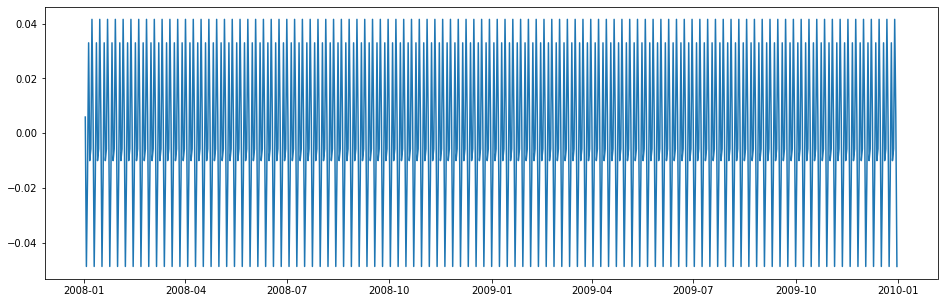

In [9]:
# Decompose the transformed data to showcase seasonality of the data
decomposed_data = seasonal_decompose(df_trans)
# Long X and small Y dictate a wide graph figure
plt.figure(figsize = [16,5])
# Plot seasonal component of the data
plt.plot(decomposed_data.seasonal);

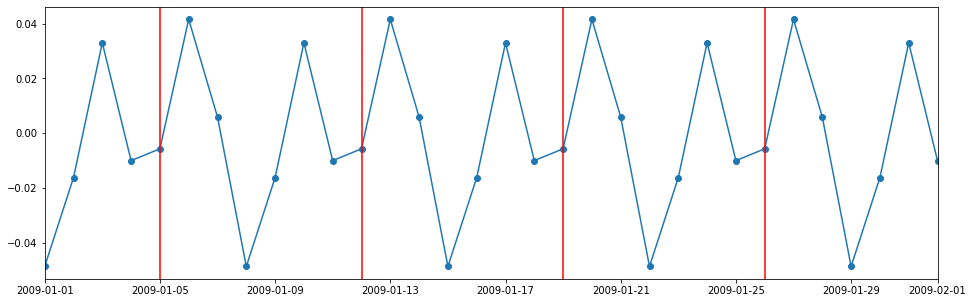

In [10]:
# Further showcase seasonality by plotting a month in the middle of the dataset for closer analysis and visualizations
# Long X and small Y dictate a wide graph figure
plt.figure(figsize = [16,5])
# Plot a seasonal component of the data
plt.plot(decomposed_data.seasonal, marker='o')
plt.xlim(pd.to_datetime('2009-01-01'), pd.to_datetime('2009-02-01'))
# Use red lines for Mondays
plt.axvline(x=pd.to_datetime('2009-01-05'), color='red')
plt.axvline(x=pd.to_datetime('2009-01-12'), color='red')
plt.axvline(x=pd.to_datetime('2009-01-19'), color='red')
plt.axvline(x=pd.to_datetime('2009-01-26'), color='red');

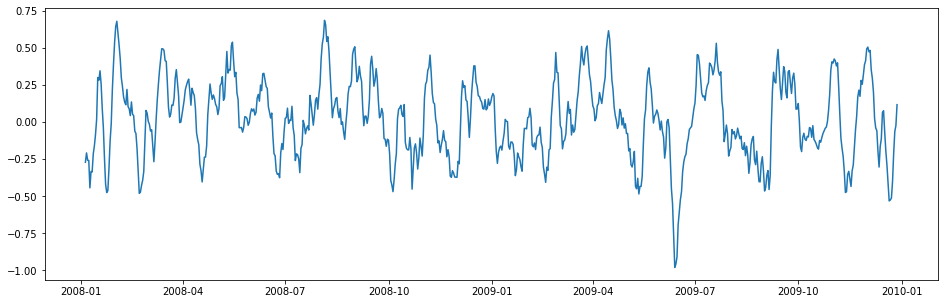

In [11]:
# Observe trend of the data
# Long X and small Y dictate a wide graph figure
plt.figure(figsize = [16,5])
# Plot trend component of the data
plt.plot(decomposed_data.trend);

C:\Users\fahim\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


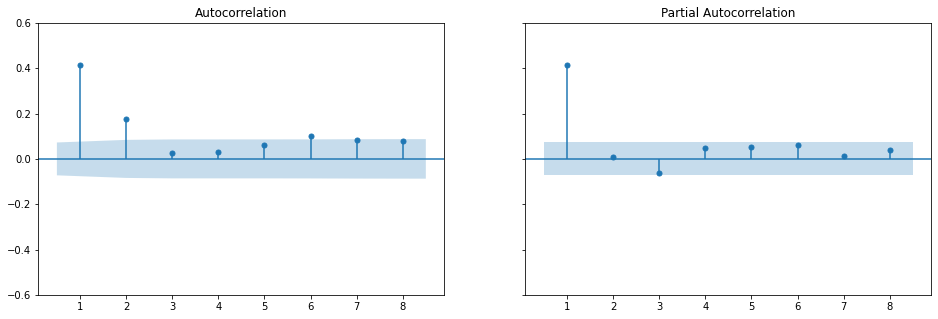

In [12]:
# Create and compare an Autocorrelation and Partial Autocorrelation plot, sharing a y axis
# We can use these plots to determine if the data is better suited for an AR (autoregression) or MA (moving average) model
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16,5], sharey=True)
# Plot ACF to 8 lags (only 7 days in a week), ignore zero (zero always = 1)
plot_acf(df_trans, lags=8, zero=False, ax=ax1)
# Plot PACF to 8 lags (only 7 days in a week), ignore zero (zero always = 1)
plot_pacf(df_trans, lags=8, zero=False,ax=ax2)
# Zoom in on y axis to see the points better
plt.ylim(-0.6, 0.6);

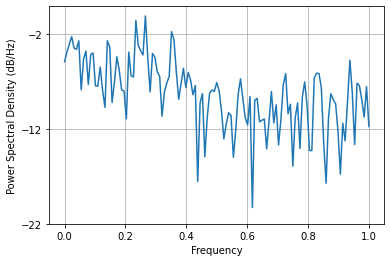

In [13]:
# Plot and observe spectral density of the data
plt.psd(x=df_trans.revenue);

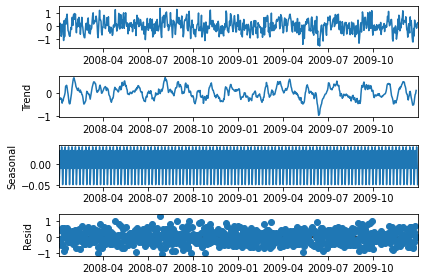

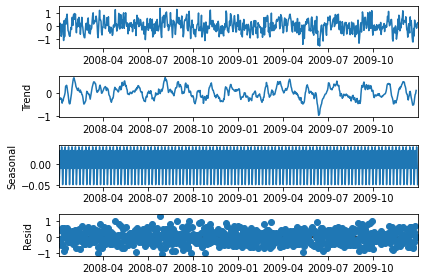

In [14]:
# Plot and observe the decomposed time series data plot
decomposed_data.plot()

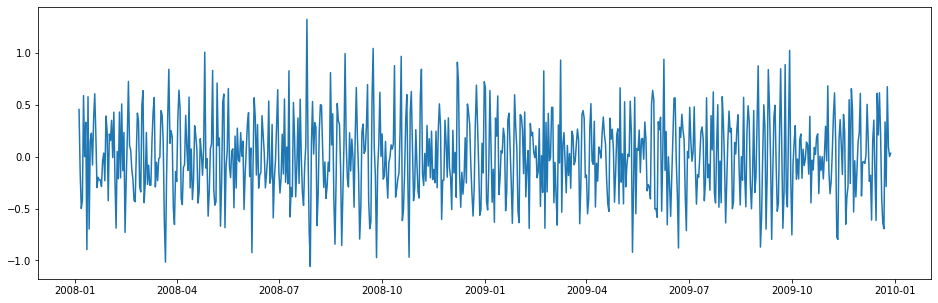

In [15]:
# Confirmed Lack of Trends in Residuals of Decomposition
# Long X and small Y dictate a wide graph figure
plt.figure(figsize = [16,5])
# Plot residual component of the data
plt.plot(decomposed_data.resid);

In [16]:
#Now that all the prelimnary observations have been made, generate an ARIMA Model of Time Series Data
model = ARIMA(train, order=(1, 0, 0), freq='D')
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                revenue   No. Observations:                  584
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -350.349
Date:                Sun, 15 Oct 2023   AIC                            706.698
Time:                        17:48:44   BIC                            719.808
Sample:                    01-02-2008   HQIC                           711.808
                         - 08-07-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0328      0.031      1.063      0.288      -0.028       0.093
ar.L1          0.4079      0.038     10.748      0.000       0.333       0.482
sigma2         0.1943      0.012     15.948      0.0

C:\Users\fahim\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


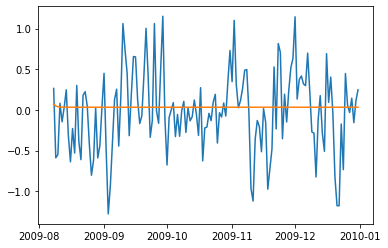

In [17]:
#Using the derived ARIMA model, perform a forcast
forecasted = results.get_prediction(start = 584, end = 729, dynamic = True)
plt.plot(test)
plt.plot(forecasted.predicted_mean);

In [18]:
print(forecasted.predicted_mean)

2009-08-08    0.071071
2009-08-09    0.048405
2009-08-10    0.039159
2009-08-11    0.035388
2009-08-12    0.033850
                ...   
2009-12-27    0.032791
2009-12-28    0.032791
2009-12-29    0.032791
2009-12-30    0.032791
2009-12-31    0.032791
Freq: D, Name: predicted_mean, Length: 146, dtype: float64


In [19]:
# Place the forecasted differences into a temporary dataframe
forecast_temp = pd.DataFrame(forecasted.predicted_mean)
# Assign the appropriate names for dataframe
forecast_temp.rename(columns={'predicted_mean' : 'revenue'}, inplace=True)
# Link together a copy of Train (through Aug 07 2009) and a copy of forecasted values (forward from Aug 08 2009)
df_w_forecast = pd.concat([train.copy(), forecast_temp.copy()])
# Now that we have one DF with the differences in daily revenue for the 2-year period, invert the differences using cumsum
df_w_forecast = df_w_forecast.cumsum()
# Check output to verify that we have the expected values 
df_w_forecast

,revenue
2008-01-02,-0.292356
2008-01-03,-0.327772
2008-01-04,-0.339987
2008-01-05,-0.124888
2008-01-06,-0.491590
...,...
2009-12-27,24.033683
2009-12-28,24.066474
2009-12-29,24.099265
2009-12-30,24.132056


In [20]:
# Calculate confidence intervals from forecasted data
confidence_intervals = forecasted.conf_int()
# Like the forecast, these confidence limits are also differences in daily revenue, these need transformed back to daily revenue
confidence_intervals

,lower revenue,upper revenue
2009-08-08,-0.792856,0.934998
2009-08-09,-0.884621,0.981430
2009-08-10,-0.904871,0.983190
2009-08-11,-0.910461,0.981237
2009-08-12,-0.912301,0.980001
...,...,...
2009-12-27,-0.913421,0.979002
2009-12-28,-0.913421,0.979002
2009-12-29,-0.913421,0.979002
2009-12-30,-0.913421,0.979002


In [21]:
# Establish a dataframe to match the confidence intervals dataframe, including the untransformed data from 2009-08-07
previous_row = pd.DataFrame({'lower revenue': [19.312734], 'upper revenue' : [19.312734], 'date' : ['2009-08-07']})
# Convert given date string to datetime and then set as index
previous_row['date'] = pd.to_datetime(previous_row['date'])
previous_row.set_index('date', inplace=True)
previous_row

,lower revenue,upper revenue
date,,
2009-08-07,19.312734,19.312734


In [22]:
# Combine the prior row and the confidence intervals data
confidence_intervals = pd.concat([previous_row, confidence_intervals])
# Un-transform the confidence intervals using cumsum()
confidence_intervals = confidence_intervals.cumsum()
# Make sure first row of data preceding the forecast is omitted
confidence_intervals = confidence_intervals.loc['2009-08-08' : '2009-12-31']
# Verify un-transformed confidence intervals
confidence_intervals

,lower revenue,upper revenue
2009-08-08,18.519878,20.247732
2009-08-09,17.635257,21.229163
2009-08-10,16.730386,22.212353
2009-08-11,15.819925,23.193590
2009-08-12,14.907624,24.173592
...,...,...
2009-12-27,-110.230261,158.297627
2009-12-28,-111.143681,159.276629
2009-12-29,-112.057102,160.255632
2009-12-30,-112.970522,161.234634


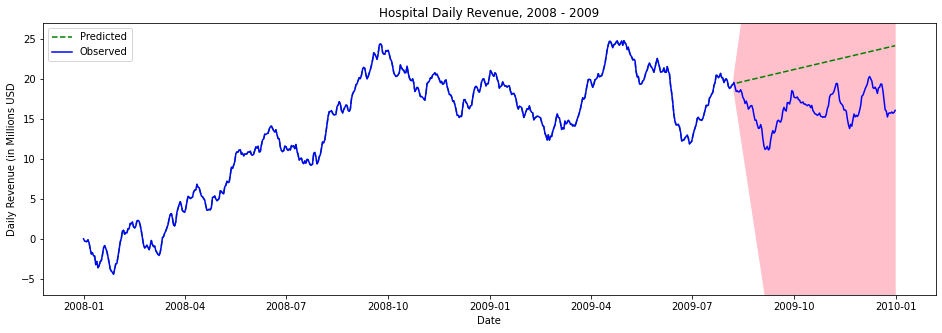

In [23]:
# Long X and small Y dictate a wide graph figure
plt.figure(figsize = [16,5])
# Modify the graph for better visual clarity and appearance
plt.title("Hospital Daily Revenue, 2008 - 2009")
plt.xlabel("Date")
plt.ylabel("Daily Revenue (in Millions USD")
# Plot the forecasted data
plt.plot(df_w_forecast, color = 'green', linestyle = 'dashed')
# Plot the original data, which will include both the train set and the test set, untransformed
plt.plot(df, color = 'blue')
# Plot the confidence intervals
plt.fill_between(confidence_intervals.index, confidence_intervals['lower revenue'], confidence_intervals['upper revenue'], color = 'pink')
# Keep the y-axis zoomed in, without expanding to fit the full confidence interval values
plt.ylim(-7, 27)
# Provide a legend for visually distinguishing predicted values from observed values
plt.legend(['Predicted', 'Observed'])
plt.show();

In [24]:
# Calculate root mean squared error of forecasted data against the observed data (both untransformed)
rmse = mean_squared_error(df.loc['2009-08-08' : '2009-12-31'], df_w_forecast.revenue.loc['2009-08-08' : '2009-12-31'], squared=False)
print(f"The root mean squared error of this forecasting model is {round(rmse, 5)}")

The root mean squared error of this forecasting model is 5.7584


<Figure size 1152x1152 with 0 Axes>

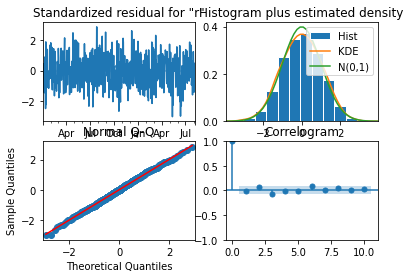

In [25]:
# Showcase Diagnostic Plots
plt.figure(figsize = [16,16])
results.plot_diagnostics();

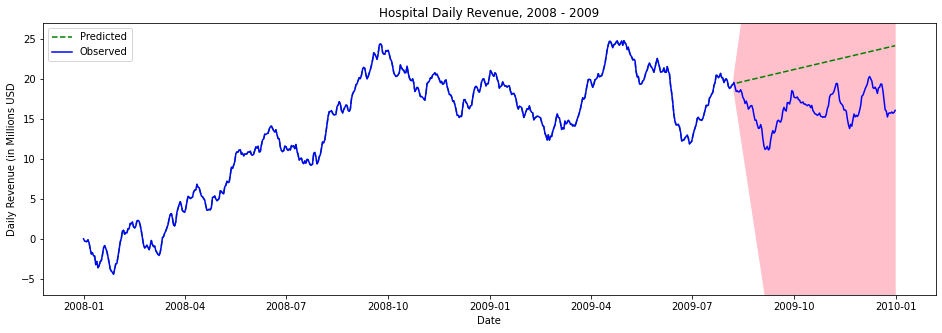

In [26]:
# Long X and small Y dictate a wide graph figure
plt.figure(figsize = [16,5])
# Modify the graph for better visual clarity and appearance
plt.title("Hospital Daily Revenue, 2008 - 2009")
plt.xlabel("Date")
plt.ylabel("Daily Revenue (in Millions USD")
# Plot the forecasted data
plt.plot(df_w_forecast, color = 'green', linestyle = 'dashed')
# Plot the original data, which will include both the train set and the test set, untransformed
plt.plot(df, color = 'blue')
# Plot the confidence intervals
plt.fill_between(confidence_intervals.index, confidence_intervals['lower revenue'], confidence_intervals['upper revenue'], color = 'pink')
# Keep the y-axis zoomed in, without expanding to fit the full confidence interval values
plt.ylim(-7, 27)
# Provide a legend for visually distinguishing predicted values from observed values
plt.legend(['Predicted', 'Observed'])
plt.show();